
# Mengelola Pelanggan Supermarket dengan Strategi Data: Studi Kasus Segmentasi LRFM dan Analisis Campaign



## Background
Di dunia ritel yang kompetitif, memahami perilaku pelanggan menjadi kunci untuk mempertahankan loyalitas dan meningkatkan penjualan. Dengan semakin kompleksnya perilaku konsumen, pendekatan konvensional tidak lagi cukup. Oleh karena itu, segmentasi pelanggan berbasis data seperti **LRFM** (Length, Recency, Frequency, Monetary) menjadi strategi yang sangat relevan.  
Dalam proyek ini, saya menganalisis data pelanggan sebuah supermarket untuk memahami pola belanja mereka dan mengevaluasi efektivitas kampanye promosi.



## Dataset dan Tujuan Proyek
**Dataset**: data pembelian customer 2012–2014, mencakup:
- Jumlah hari sejak terakhir pembelian
- Pengeluaran per kategori produk
- Jumlah pembelian per kanal
- Respon terhadap lima kampanye promosi  
**Total**: >2.000 entri pelanggan selama dua tahun.

**Tujuan utama:**
1. Menganalisa pembelian pelanggan.
2. Membuat segmentasi pelanggan berdasarkan skor LRFM.
3. Menganalisis keterkaitan segmentasi dengan efektivitas kampanye promosi.
4. Memberikan rekomendasi bisnis untuk meningkatkan loyalitas pelanggan.


# Data Dictionary Pelanggan Supermarket

## People (Data Pribadi Pelanggan)
- **ID**: Identitas unik pelanggan.
- **Year_Birth**: Tahun kelahiran pelanggan.
- **Education**: Tingkat pendidikan pelanggan.
- **Marital_Status**: Status pernikahan pelanggan.
- **Income**: Pendapatan tahunan rumah tangga pelanggan.
- **Kidhome**: Jumlah anak kecil di rumah tangga pelanggan.
- **Teenhome**: Jumlah remaja di rumah tangga pelanggan.
- **Dt_Customer**: Tanggal pelanggan pertama kali bergabung dengan perusahaan.
- **Recency**: Jumlah hari sejak pembelian terakhir pelanggan.
- **Complain**: Bernilai `1` jika pelanggan pernah mengajukan komplain dalam 2 tahun terakhir, `0` jika tidak.

## Products (Produk)
- **MntWines**: Jumlah pengeluaran untuk wine dalam 2 tahun terakhir.
- **MntFruits**: Jumlah pengeluaran untuk buah-buahan dalam 2 tahun terakhir.
- **MntMeatProducts**: Jumlah pengeluaran untuk produk daging dalam 2 tahun terakhir.
- **MntFishProducts**: Jumlah pengeluaran untuk produk ikan dalam 2 tahun terakhir.
- **MntSweetProducts**: Jumlah pengeluaran untuk produk manis (sweets) dalam 2 tahun terakhir.
- **MntGoldProds**: Jumlah pengeluaran untuk produk emas dalam 2 tahun terakhir.

## Promotion (Promosi)
- **NumDealsPurchases**: Jumlah pembelian yang dilakukan dengan diskon.
- **AcceptedCmp1**: Bernilai `1` jika pelanggan menerima penawaran pada kampanye pertama, `0` jika tidak.
- **AcceptedCmp2**: Bernilai `1` jika pelanggan menerima penawaran pada kampanye kedua, `0` jika tidak.
- **AcceptedCmp3**: Bernilai `1` jika pelanggan menerima penawaran pada kampanye ketiga, `0` jika tidak.
- **AcceptedCmp4**: Bernilai `1` jika pelanggan menerima penawaran pada kampanye keempat, `0` jika tidak.
- **AcceptedCmp5**: Bernilai `1` jika pelanggan menerima penawaran pada kampanye kelima, `0` jika tidak.
- **Response**: Bernilai `1` jika pelanggan menerima penawaran pada kampanye terakhir, `0` jika tidak.

## Place (Tempat)
- **NumWebPurchases**: Jumlah pembelian yang dilakukan melalui situs web perusahaan.
- **NumCatalogPurchases**: Jumlah pembelian yang dilakukan menggunakan katalog.
- **NumStorePurchases**: Jumlah pembelian yang dilakukan langsung di toko.
- **NumWebVisitsMonth**: Jumlah kunjungan ke situs web perusahaan dalam 1 bulan terakhir.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('customer_segments LRFM.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Length_Category,LengthCategory,Total_Purchases,Frequency_Category,Monetary_Category,Length_Score,Recency_Score,Monetary_Score,Frequency_Score,LRFM_Score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,Long (>2y),Long,22,High,High,3,2,3,3,3233
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,Short (<1y),Medium,4,Low,Low,1,2,1,1,1211
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,Medium (1-2y),Long,20,High,Medium,2,1,2,3,2132
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,Short (<1y),Medium,6,Low,Low,1,1,1,1,1111
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,Short (<1y),Medium,14,Medium,Medium,1,3,2,2,1322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,Medium (1-2y),Long,16,Medium,High,2,2,3,2,2223
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,Short (<1y),Medium,15,Medium,Medium,1,2,2,2,1222
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,Short (<1y),Medium,18,High,High,1,3,3,3,1333
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,Short (<1y),Medium,21,High,High,1,1,3,3,1133



---
## Data Preparation & Data Cleaning
- **Missing Values**: 24 nilai kosong pada kolom `Income` (tidak diimputasi karena tidak digunakan dalam analisis utama).
- **Duplicate Check**: Tidak ada duplikasi ID.
- **Outlier**: Ada pada fitur pengeluaran produk, tidak dihapus karena metode segmentasi relatif dan cukup robust. Ke depan, normalisasi/penanganan outlier bisa dipertimbangkan untuk model prediktif.


In [11]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
R_Score                 0
Frequency               0
Monetary                0
F_Score                 0
M_Score                 0
Segment                 0
LastPurchase            0
Length                  0
Length_Category         0
LengthCatego


---
## Feature Engineering
Fitur yang diturunkan untuk mendukung segmentasi LRFM:
- **Dt_customer**: tanggal terakhir pembelian berdasarkan `Recency` → dipakai untuk *Length score*.
- **Total Purchases**: total semua transaksi dari berbagai kanal.
- **Length_Score & Category**: skor dan klasifikasi lama menjadi customer.
- **Frequency_Score & Category**: skor dan klasifikasi frekuensi belanja.
- **Monetary_Score & Category**: skor dan klasifikasi total pengeluaran.
- **Recency Category**: kategori aktivitas terakhir belanja.
- **Segment**: segmentasi akhir hasil penggabungan skor LRFM.


In [23]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


In [25]:
cutoff_date = pd.to_datetime('2014-12-31')
df['Length'] = (cutoff_date - df['Dt_Customer']).dt.days



---
## Exploratory Data Analysis (EDA)
Eksplorasi dilakukan dari tiga perspektif:
1. **Customer Lifetime & Recency Behavior** — waktu terakhir transaksi dan tahun pertama registrasi.
2. **Product & Sales Channel Analysis** — produk dan kanal yang paling berkontribusi pada penjualan.
3. **Campaign Result Analysis** — efektivitas masing-masing campaign terhadap penerimaan pelanggan.



### Customer Lifetime & Recency Behavior
- Pelanggan pertama kali bergabung: **Juli 2012–Juli 2014** (dasar pembentukan *Length score*).
- Waktu transaksi terakhir: **Sept–Des 2014** (0–100 hari dari tanggal referensi) → dasar *Recency*.


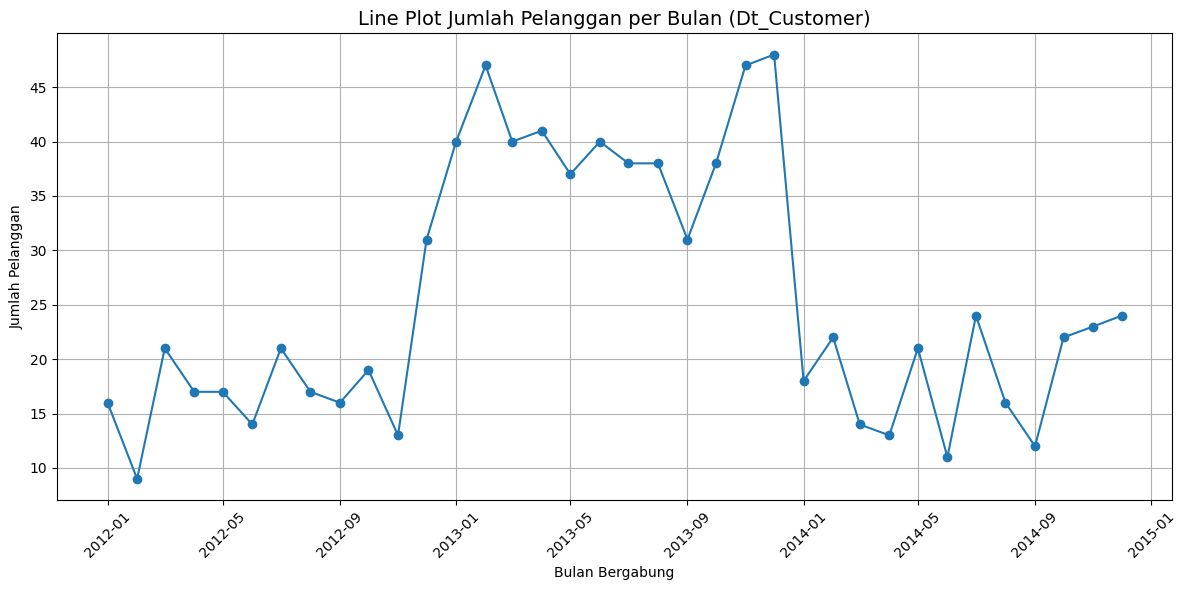

In [12]:

# 1. Merubah Dt_Customer sudah dalam format datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce')

# 2. Buat kolom bulan dari tanggal customer mendaftar
df['JoinMonth'] = df['Dt_Customer'].dt.to_period('M').dt.to_timestamp()

# 3. Hitung jumlah pelanggan per bulan
monthly_customers = df.groupby('JoinMonth').size().reset_index(name='CustomerCount')

# 4 line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_customers['JoinMonth'], monthly_customers['CustomerCount'], marker='o', linestyle='-')
plt.title('Line Plot Jumlah Pelanggan per Bulan (Dt_Customer)', fontsize=14)
plt.xlabel('Bulan Bergabung')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


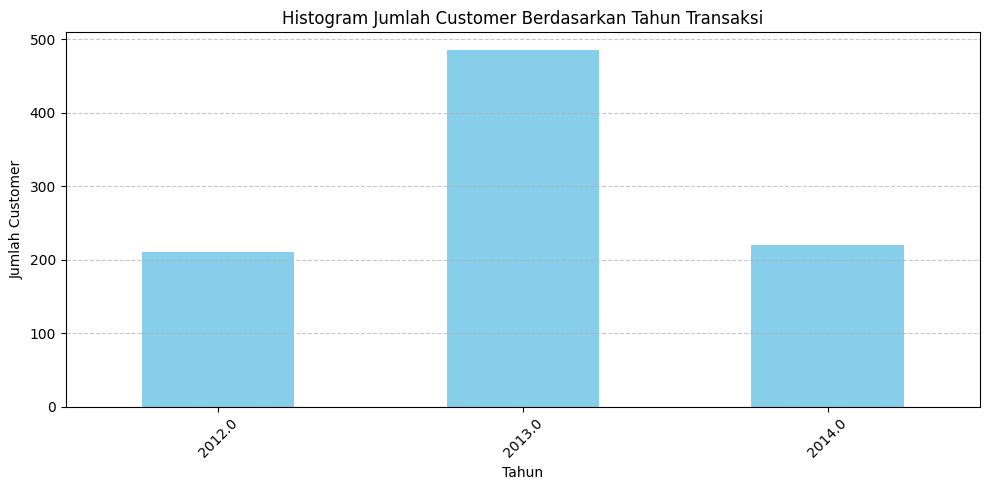

In [14]:

# Pastikan Dt_Customer dalam format datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Ekstrak tahun dari Dt_Customer
df['Year'] = df['Dt_Customer'].dt.year

# Buat histogram jumlah customer yang mendaftar (bertransaksi) per tahun
plt.figure(figsize=(10, 5))
df['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title('Histogram Jumlah Customer Berdasarkan Tahun Transaksi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Product Analysis
- Sumber pendapatan terbesar (total pengeluaran per kategori): **Wines** (680,816) & **Meat Products** (373,968).
- Tidak ada data jumlah pembelian per kategori produk → digunakan indikator “pernah membeli” per produk sebagai pendekatan frekuensi produk.
- Produk yang paling sering dibeli (berdasarkan pelanggan yang pernah membeli): **Meat**, **Wines**, **Gold**.


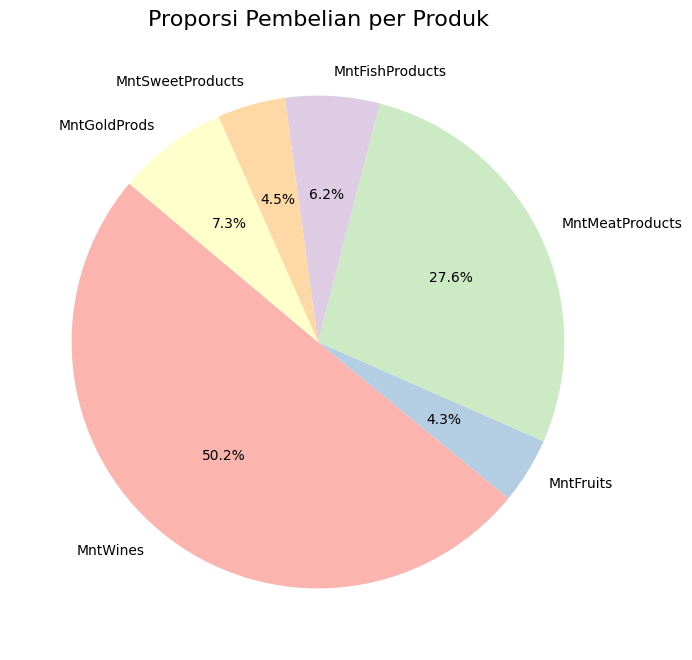

In [15]:

# Hitung total pembelian untuk masing-masing produk
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_per_product = df[product_cols].sum()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(total_per_product, labels=product_cols, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Proporsi Pembelian per Produk', fontsize=16)
plt.show()


NameError: name 'ax2' is not defined

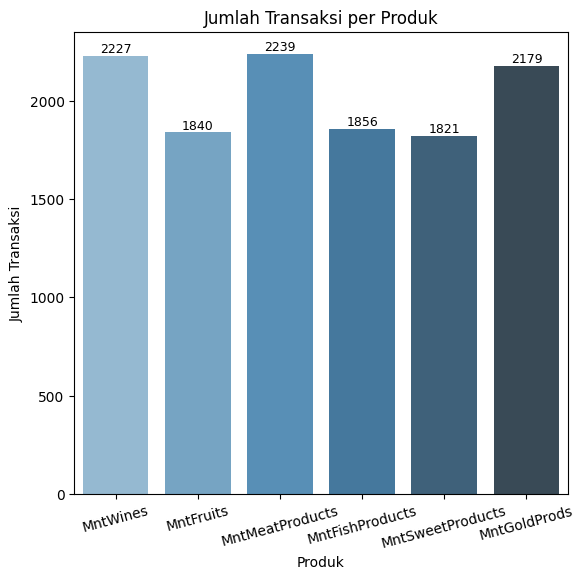

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom produk
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# --- 1. Hitung Jumlah Transaksi (berapa customer yang beli masing-masing produk) ---
transaction_counts = (df[product_cols] > 0).sum()
transaction_counts.name = 'TransactionCount'

# --- 2. Hitung Total Nominal Pembelian ---
total_amounts = df[product_cols].sum()
total_amounts.name = 'TotalAmount'

# --- 3. Gabungkan ke dalam satu DataFrame ---
summary_df = pd.concat([transaction_counts, total_amounts], axis=1).reset_index()
summary_df.columns = ['Product', 'TransactionCount', 'TotalAmount']

# --- 4. Visualisasi Dua Bar Plot Sampingan ---
plt.figure(figsize=(14, 6))

# --- Plot 1: Jumlah Transaksi ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=summary_df, x='Product', y='TransactionCount', palette='Blues_d')
plt.title('Jumlah Transaksi per Produk')
plt.xlabel('Produk')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=15)

# Tambahkan label di atas batang
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height + 1, int(height),
             ha='center', va='bottom', fontsize=9)


# Tambahkan label di atas batang
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2, height + summary_df['TotalAmount'].max() * 0.01, 
             f"{int(height):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



### Sales Channel Analysis
Pembelian di **toko fisik** masih mendominasi. Kanal **online** (web/katalog) juga signifikan, terutama pelanggan muda. Total dari seluruh pembelian kanal menjadi dasar segmentasi **Frequency**.


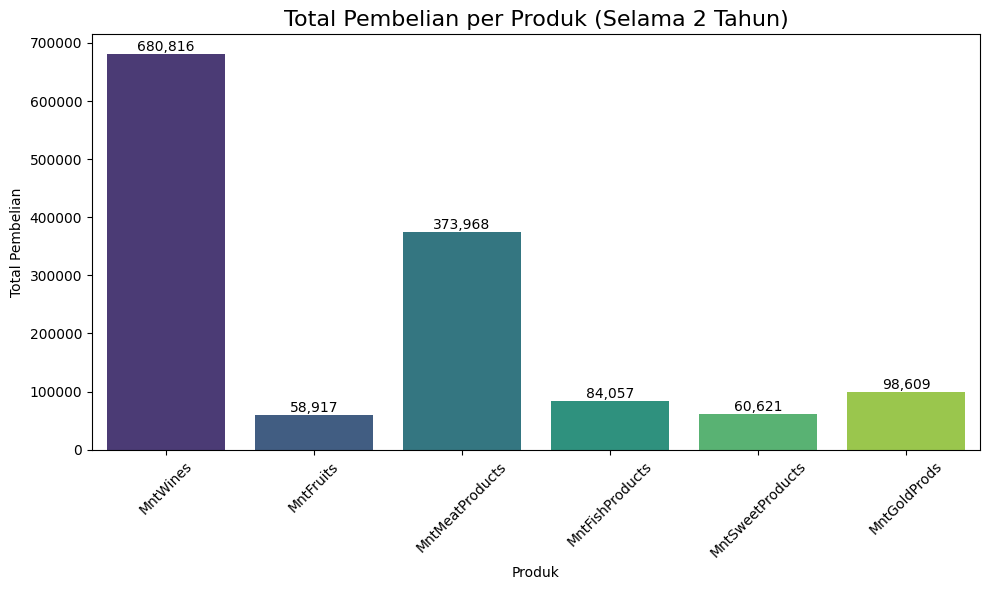

In [18]:

# List kolom produk
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Hitung total pembelian per produk
total_per_product = df[product_cols].sum()

# Ubah ke dataframe
product_df = total_per_product.reset_index()
product_df.columns = ['Product', 'TotalSpent']

# --- 📊 Bar Plot ---
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=product_df, x='Product', y='TotalSpent', palette='viridis')

# Tambahkan label jumlah di atas tiap bar
for index, row in product_df.iterrows():
    ax.text(index, row['TotalSpent'] + 10,  # +10 agar tidak menempel di bar
            f"{int(row['TotalSpent']):,}",  # format dengan koma
            ha='center', va='bottom', fontsize=10)

plt.title('Total Pembelian per Produk (Selama 2 Tahun)', fontsize=16)
plt.xlabel('Produk')
plt.ylabel('Total Pembelian')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sales Channel Analysis
Analisis kanal penjualan dilakukan untuk memahami frekuensi pembelian melalui masing-masing media: **web**, **katalog**, dan **toko fisik**.

Hasil analisis menunjukkan bahwa pembelian di **toko fisik** masih mendominasi, meskipun pembelian melalui kanal **online** juga memberikan kontribusi signifikan, terutama dari pelanggan muda.  
Total pembelian dari seluruh kanal ini menjadi dasar penentuan **Frequency** pada segmentasi **LRFM**.


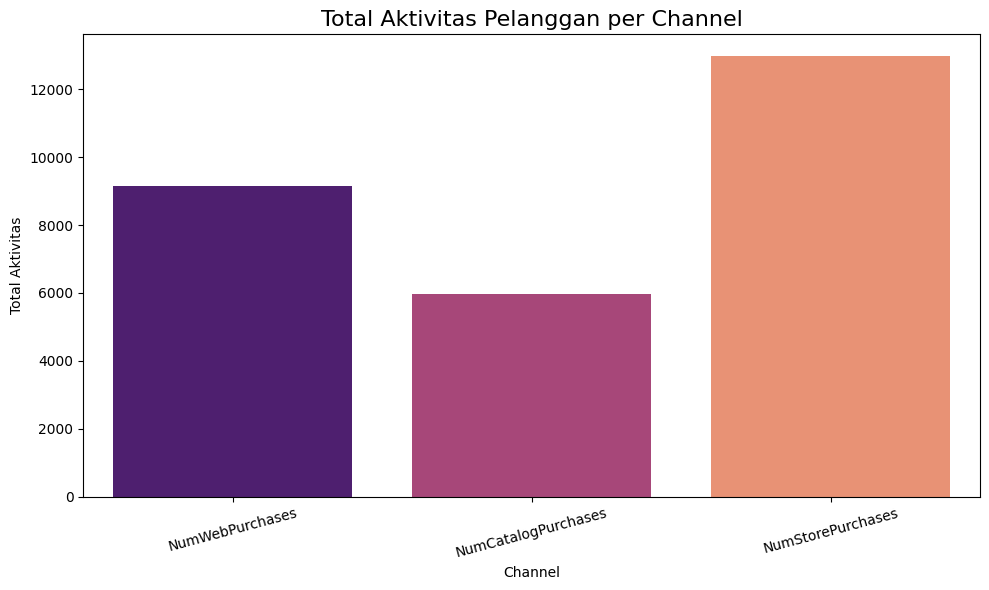

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom channel pembelian & aktivitas
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 
                'NumStorePurchases']

# Hitung total aktivitas per channel
total_channel = df[channel_cols].sum().reset_index()
total_channel.columns = ['Channel', 'Total']

# --- 📊 Bar Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(data=total_channel, x='Channel', y='Total', palette='magma')

plt.title('Total Aktivitas Pelanggan per Channel', fontsize=16)
plt.xlabel('Channel')
plt.ylabel('Total Aktivitas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


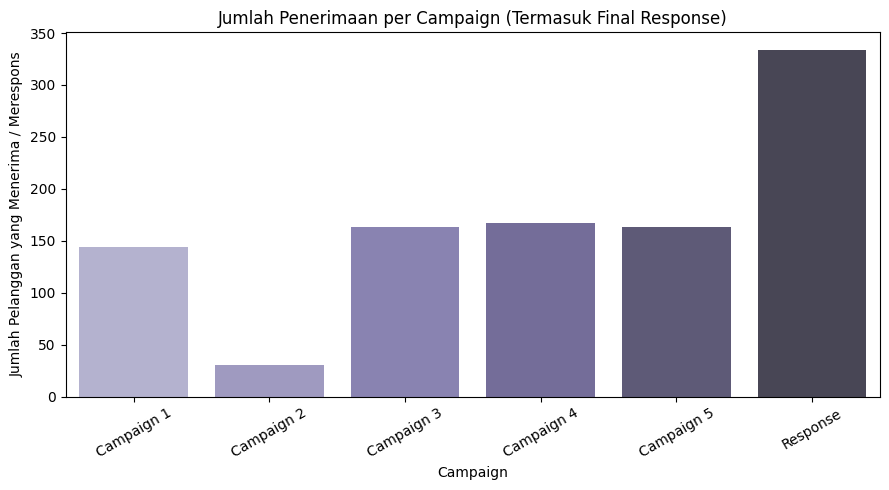


### Promotion Acceptance
- Penerimaan campaign tertinggi: **Response** (334 pelanggan).
- Pelanggan yang pernah menerima campaign sebelumnya memiliki **response rate 40,6%**, sedangkan yang belum pernah hanya **8,2%**.



---
## Segmentasi LRFM
**Dimensi & Skor:**
- **Length**: <1 tahun → 1; 1–2 tahun → 2; >2 tahun → 3
- **Recency**: >60 hari → 1; 30–60 hari → 2; <30 hari → 3
- **Frequency & Monetary**: ditentukan berdasarkan kuartil distribusi.

**Segmen:**
1. **Top of the Top** — skor sempurna; sangat loyal dan bernilai tinggi.
2. **Big Spenders** — pengeluaran besar tapi frekuensi rendah/tidak konsisten.
3. **Top Tier** — aktif & sering belanja; loyalitas tinggi.
4. **Promising** — pelanggan baru yang cukup aktif; potensi besar.
5. **At Risk** — pelanggan lama namun tidak aktif.
6. **Middle Class** — skor menengah.
7. **Bot Frag** — skor LRFM rendah; berisiko tinggi ditinggalkan.

**Distribusi segmen:** *Bot Frag* terbanyak (**25,5%**), *Top of The Top* terendah (**4,6%**).


In [26]:
cutoff_date = pd.to_datetime('2014-12-31')
df['Length'] = (cutoff_date - df['Dt_Customer']).dt.days


Length_Category
Short (<1y)      220
Medium (1-2y)    485
Long (>2y)       211
Name: count, dtype: int64


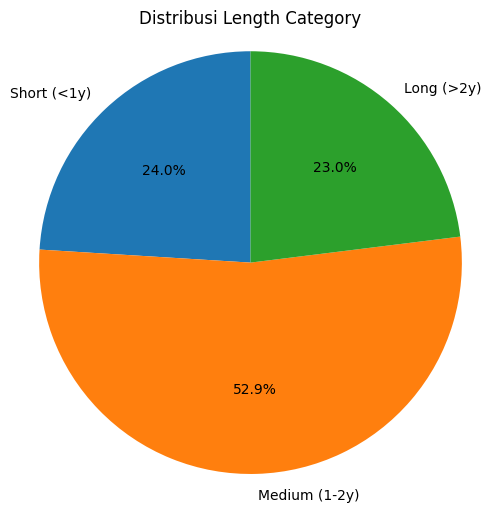

In [27]:
# Buat bins baru dan label
bins = [0, 364, 729, df['Length'].max()]
labels = ['Short (<1y)', 'Medium (1-2y)', 'Long (>2y)']

# Terapkan kategori Length
df['Length_Category'] = pd.cut(df['Length'], bins=bins, labels=labels, include_lowest=True)

# Cek jumlah per kategori
length_counts = df['Length_Category'].value_counts().sort_index()
print(length_counts)

# Pie chart distribusi kategori
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(length_counts, labels=length_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Length Category')
plt.axis('equal')  # agar pie chart bulat
plt.show()


Distribusi Frequency Category:
Frequency_Category
Low       843
Medium    737
High      660
Name: count, dtype: int64


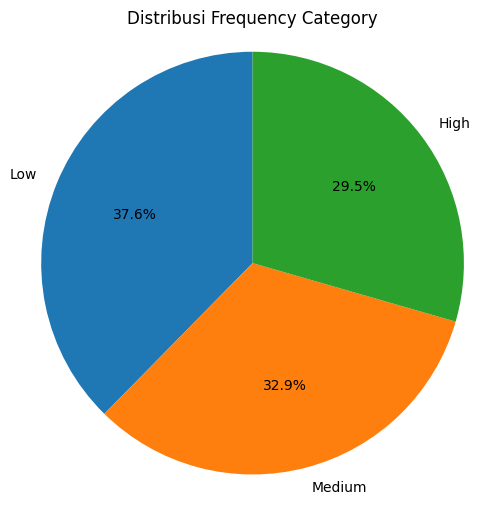

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Hitung total pembelian
df['Total_Purchases'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

# 2. Klasifikasi Frequency ke dalam 3 kategori (tertile)
df['Frequency_Category'] = pd.qcut(df['Total_Purchases'], q=3, labels=['Low', 'Medium', 'High'])

# 3. Mapping Frequency_Category ke Frequency_Score
score_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Frequency_Score'] = df['Frequency_Category'].map(score_map)

# 4. Cek distribusi
freq_counts = df['Frequency_Category'].value_counts().sort_index()
print("Distribusi Frequency Category:")
print(freq_counts)

# 5. Visualisasi pie chart
plt.figure(figsize=(6, 6))
plt.pie(freq_counts, labels=freq_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Frequency Category')
plt.axis('equal')
plt.show()


In [29]:
# Klasifikasi Monetary menjadi 3 bagian: Low, Medium, High
df['Monetary_Category'] = pd.qcut(df['Monetary'], q=3, labels=['Low', 'Medium', 'High'])


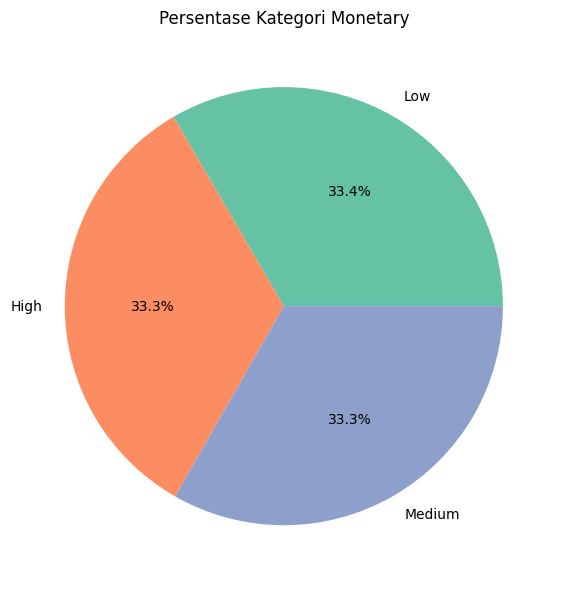

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misalnya df adalah DataFrame yang punya kolom 'Monetary_Category'
# Hitung jumlah tiap kategori
monetary_counts = df['Monetary_Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    monetary_counts.values,
    labels=monetary_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2')
)
plt.title('Persentase Kategori Monetary')
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

# 1. Recency_Score (manual logic)
def recency_score(val):
    if val <= 30:
        return 3
    elif val <= 60:
        return 2
    else:
        return 1

df['Recency_Score'] = df['Recency'].apply(recency_score)

# 2. Length_Score dari Length_Category
length_map = {
    'Short': 1,
    'Medium': 2,
    'Long': 3
}
df['Length_Score'] = df['Length_Category'].map(length_map)

# 3. Frequency_Score dari Total_Purchases menggunakan qcut
df['Frequency_Score'] = pd.qcut(df['Total_Purchases'], 3, labels=[1, 2, 3])

# 4. Monetary_Score dari Monetary menggunakan qcut
df['Monetary_Score'] = pd.qcut(df['Monetary'], 3, labels=[1, 2, 3])


Distribusi Recency Category:
Recency_Category
High      724
Low       862
Medium    654
Name: count, dtype: int64


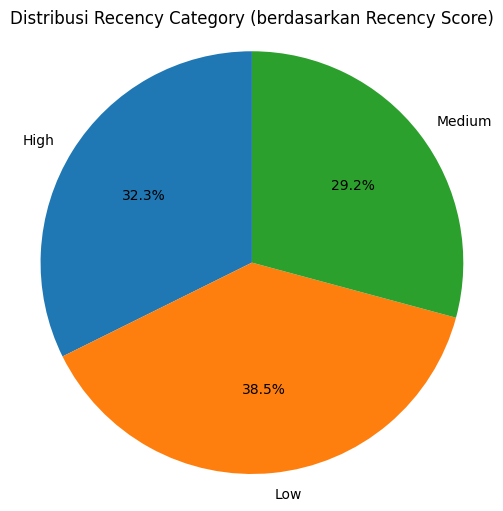

In [40]:
# 1. Mapping Recency_Score ke Recency_Category
recency_category_map = {
    3: 'High',
    2: 'Medium',
    1: 'Low'
}
df['Recency_Category'] = df['Recency_Score'].map(recency_category_map)

# 2. Tampilkan tabel distribusi
recency_dist = df['Recency_Category'].value_counts().sort_index()
print("Distribusi Recency Category:")
print(recency_dist)

# 3. Visualisasi pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(recency_dist, labels=recency_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Recency Category (berdasarkan Recency Score)')
plt.axis('equal')
plt.show()


In [33]:
def segment_customer(row):
    total_score = (
        int(row['Length_Score']) +
        int(row['Recency_Score']) +
        int(row['Frequency_Score']) +
        int(row['Monetary_Score'])
    )

    # 1. Top of the Top: Skor total paling tinggi
    if total_score >= 12:
        return 'Top of the Top'

    # 2. Big Spenders: Nilai besar tapi frekuensi rendah
    elif row['Monetary_Score'] == 3 and row['Frequency_Score'] <= 2 and total_score < 12:
        return 'Big Spenders'

    # 3. Top Tier: Loyal & sering beli
    elif row['Frequency_Score'] == 3 and row['Length_Score'] == 3 and total_score < 12:
        return 'Top Tier'

    # 4. Promising: Baru transaksi dan cukup aktif
    elif row['Recency_Score'] == 3 and row['Frequency_Score'] >= 2 and total_score < 11:
        return 'Promising'

    # 5. At Risk: Pelanggan lama tapi sudah lama tidak transaksi
    elif row['Recency_Score'] == 1 and row['Length_Score'] >= 2 and total_score < 11:
        return 'At Risk'

    # 6. Middle Class: Skor menengah
    elif total_score >= 7:
        return 'Middle Class'

    # 7. Botfrag: Skor cukup rendah tapi masih aktif sedikit
    else:
        return 'Botfrag'

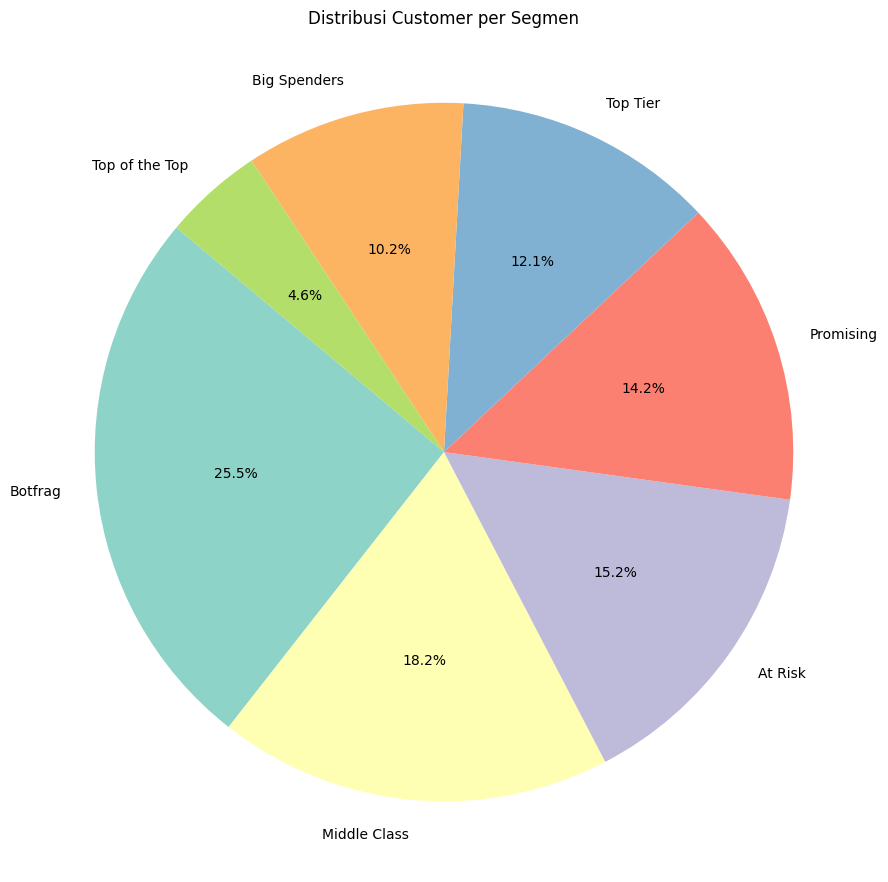

In [38]:
segment_counts = df['Segment'].value_counts()

plt.figure(figsize=(9, 9))
plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Distribusi Customer per Segmen')
plt.axis('equal')
plt.tight_layout()

plt.show()



---
## Analisis Kampanye Promosi
1. **Korelasi Campaign Acceptance** dengan Frequency & Monetary (Spearman): *Campaign 5* tertinggi → paling terkait dengan total pembelian/pengeluaran.
2. **Persentase Respon per Segmen**: *Top Tier* paling tinggi (≈ **20%**), *Top of the Top* paling rendah.
3. **Average Acceptance** per campaign:
   - Tertinggi: **Response** (≈ **16,1%**)
   - Terendah: **Campaign 2** (≈ **1,7%**)

**Efektivitas per Segmen:**
- **Top Tier, Promising, Bot Frag, Middle Class, Big Spender** → *Response* paling efektif.
- **Top of the Top** → *Campaign 5* paling efektif.
- **At Risk** → *Response* & *Campaign 4* efektif.


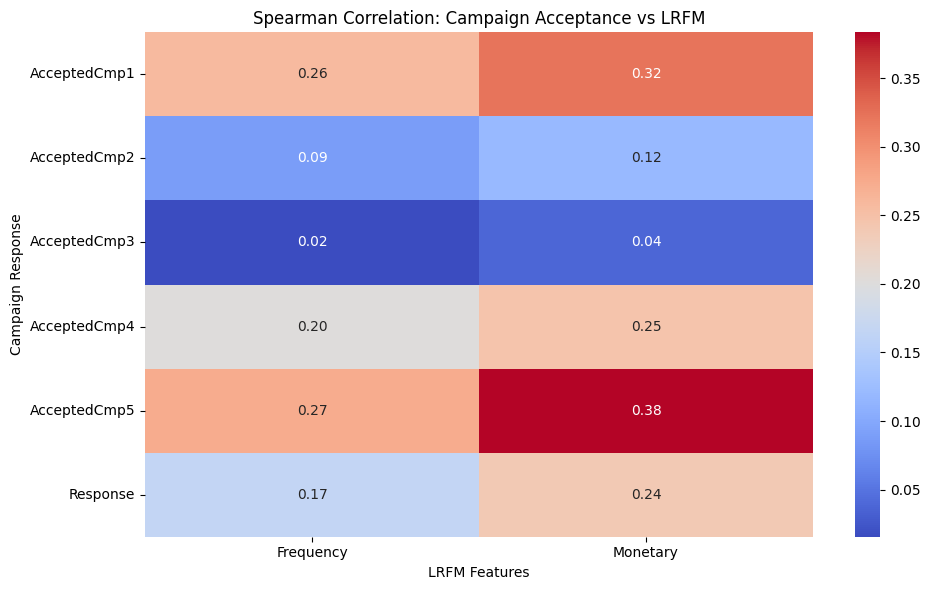

In [22]:
# Kolom Campaign
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Kolom LRFM
lrfm_cols = ['Frequency', 'Monetary']  # pastikan ini sesuai dengan kolom di df

# Gabungkan untuk korelasi
cols_to_corr = campaign_cols + lrfm_cols
corr_data = df[cols_to_corr]


# Korelasi Spearman
spearman_corr = corr_data.corr(method='spearman')


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(
    spearman_corr.loc[campaign_cols, lrfm_cols],
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Spearman Correlation: Campaign Acceptance vs LRFM')
plt.xlabel('LRFM Features')
plt.ylabel('Campaign Response')
plt.tight_layout()
plt.show()



---
## Insight & Treatment Plan per Segmen
**1. Top of the Top**  
*Insight*: skor LRFM tertinggi, penerimaan campaign terendah.  
*Plan*: fokus loyalty program jangka panjang; hindari campaign umum; lakukan feedback session.

**2. Big Spenders**  
*Insight*: nilai tinggi; partisipasi campaign moderat.  
*Plan*: bundling premium (mis. Meat/Wines), penawaran eksklusif terbatas waktu, tekankan nilai premium.

**3. Top Tier**  
*Insight*: kontribusi tertinggi terhadap campaign (~20%).  
*Plan*: reward berbasis frekuensi, komunikasi rutin & follow-up intensif, manfaatkan *Response*.

**4. Promising**  
*Insight*: cukup aktif, berpotensi loyal.  
*Plan*: diskon pembelian kedua, personalized email follow-up, kombinasi *Response* & *Campaign 3*.

**5. At Risk**  
*Insight*: lama tidak aktif, respons rendah.  
*Plan*: reaktivasi emosional, insentif besar untuk pembelian berikutnya, survey singkat alasan non-aktif.

**6. Middle Class**  
*Insight*: respons menengah.  
*Plan*: A/B testing *Campaign 3* vs *Response*, newsletter/diskon musiman, dorong menuju *Top Tier*.

**7. Bot Frag**  
*Insight*: *Campaign 1* & *5* kurang efektif.  
*Plan*: hindari campaign mahal; gunakan awareness murah (email ringan/sosmed); segmentasi ulang untuk penyelamatan.



---
## Business Insight Tambahan
- Prioritaskan **retargeting** pelanggan yang pernah ikut campaign.
- **Bundling**: *Meat + Wines* untuk memaksimalkan popularitas & monetary.
- Dorong pembelian via **katalog/web** untuk menaikkan total transaksi kanal tersebut.
- Rancang campaign baru yang lebih efektif dari sebelumnya (personalisasi, timing, kanal).


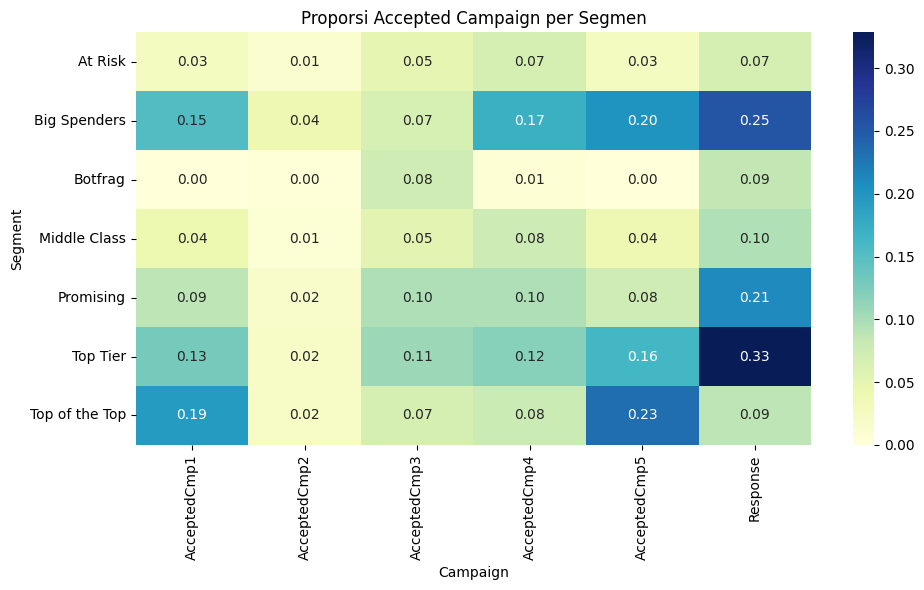

In [37]:
pivot_table = campaign_by_segment.pivot(index='Segment', columns='campaign', values='accepted')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Proporsi Accepted Campaign per Segmen')
plt.ylabel('Segment')
plt.xlabel('Campaign')
plt.tight_layout()
plt.show()


In [36]:
# Buat salinan data dan reshape untuk visualisasi
df_melted = df.melt(
    id_vars='Segment',
    value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
    var_name='campaign',
    value_name='accepted'
)

# Hitung rata-rata accepted per campaign per segment
campaign_by_segment = df_melted.groupby(['Segment', 'campaign'])['accepted'].mean().reset_index()



---
## Penutup
Segmentasi berbasis LRFM efektif memahami perilaku pelanggan dan menyesuaikan strategi promosi. Dengan pendekatan ini, supermarket dapat mengalokasikan sumber daya promosi secara lebih tepat dan meningkatkan pemasukan dari kampanye pemasaran. Strategi serupa relevan bagi bisnis lain yang ingin memahami pelanggan mereka secara lebih dalam.


In [ ]:
# Placeholder: ruang untuk menambahkan kode analitik di masa depan
# Misalnya, visualisasi distribusi LRFM atau perhitungan skor otomatis
pass